# Poisson 95% confidence intervals

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm

%matplotlib widget

## Settings

In [13]:
confint_percentage = 0.95
# confint_percentage = 0.9999
confint_stddev_low, confint_stddev_high = norm.interval(confint_percentage)

confint_percentage_half = (1 - confint_percentage) / 2
confint_percentile_low = confint_percentage_half
confint_percentile_high = 1 - confint_percentage_half


## Normal approximation

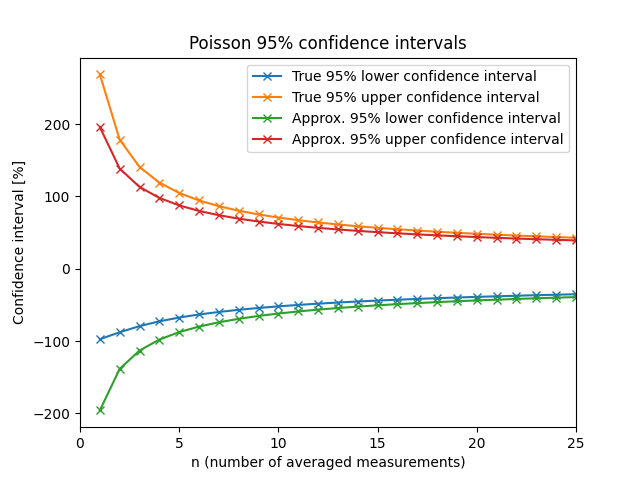

In [14]:
n = np.arange(1, 100000)

n_low = 0.5 * chi2.ppf(confint_percentile_low, df=2 * n)
n_high = 0.5 * chi2.ppf(confint_percentile_high, df=2 * n)

confint_low = (n_low - n) / n
confint_high = (n_high - n) / n

confint_low_approx = confint_stddev_low / np.sqrt(n)
confint_high_approx = confint_stddev_high / np.sqrt(n)

N_zoom = 25

plt.figure()
plt.title('Poisson 95% confidence intervals')
plt.xlabel('n (number of averaged measurements)')
plt.ylabel('Confidence interval [%]')
c1, = plt.plot(n, 100 * confint_low, marker='x', label='True 95% lower confidence interval')
c2, = plt.plot(n, 100 * confint_high, marker='x', label='True 95% upper confidence interval')
c3, = plt.plot(n, 100 * confint_low_approx, marker='x', label='Approx. 95% lower confidence interval')
c4, = plt.plot(n, 100 * confint_high_approx, marker='x', label='Approx. 95% upper confidence interval')
plt.xlim(0, N_zoom)
plt.legend(handles=[c1, c2, c3, c4], loc='upper right')
plt.show()

## Difference approximation

-0.97468219201571 2.6888794541139354
-0.8788953607280174 1.785821695469449
[ 0.97763241 -0.1168306 ]
[0.92095147 0.34074598]


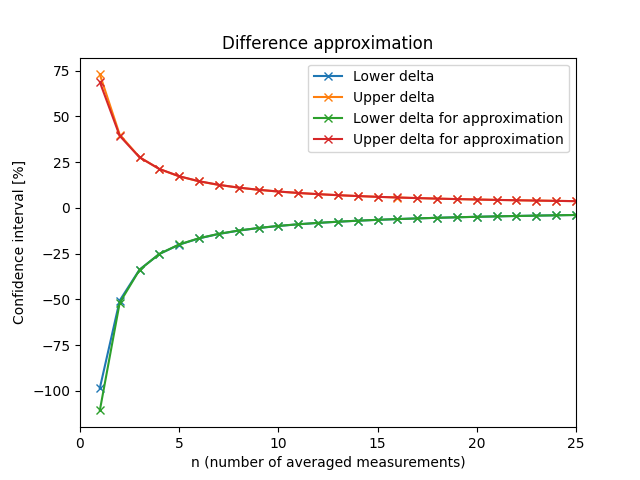

In [15]:
delta_low = confint_low - confint_low_approx
delta_high = confint_high - confint_high_approx

# Store first two values
print(confint_low[0], confint_high[0])
print(confint_low[1], confint_high[1])

def func(n, a, b):
    return a / (n + b)

# Approximate from third sample...
p_low, _ = curve_fit(func, n[2:], delta_low[2:])
p_high, _ = curve_fit(func, n[2:], delta_high[2:])

print(p_low)
print(p_high)

delta_low_approx = func(n, p_low[0], p_low[1])
delta_high_approx = func(n, p_high[0], p_high[1])

plt.figure()
plt.title('Difference approximation')
plt.xlabel('n (number of averaged measurements)')
plt.ylabel('Confidence interval [%]')
c1, = plt.plot(n, -100 * delta_low, marker='x', label='Lower delta')
c2, = plt.plot(n, 100 * delta_high, marker='x', label='Upper delta')
c3, = plt.plot(n,-100 * delta_low_approx, marker='x', label='Lower delta for approximation')
c4, = plt.plot(n, 100 * delta_high_approx, marker='x', label='Upper delta for approximation')
plt.xlim(0, N_zoom)
plt.legend(handles=[c1, c2, c3, c4], loc='upper right')
plt.show()

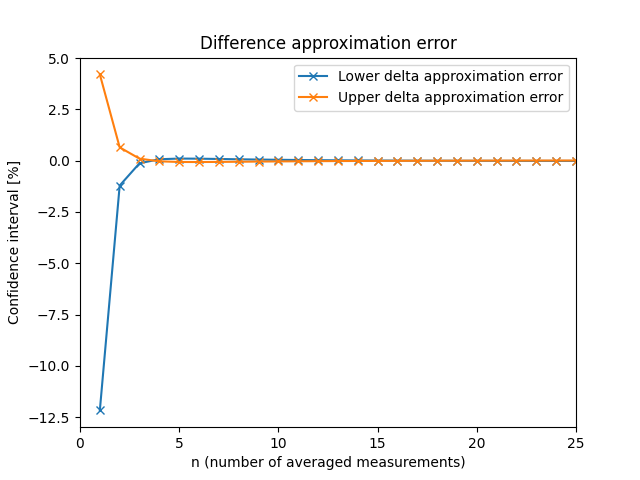

In [16]:
delta2_low = delta_low - delta_low_approx
delta2_high = delta_high - delta_high_approx

plt.figure()
plt.title('Difference approximation error')
plt.xlabel('n (number of averaged measurements)')
plt.ylabel('Confidence interval [%]')
c1, = plt.plot(n, 100 * delta2_low, marker='x', label='Lower delta approximation error')
c2, = plt.plot(n, 100 * delta2_high, marker='x', label='Upper delta approximation error')
plt.xlim(0, N_zoom)
plt.legend(handles=[c1, c2], loc='upper right')
plt.xlim(0, N_zoom)
plt.show()